# CGEM the Notebook
## Testing temperature dependence

## Compile the code

In [15]:
!make

gfortran -o CGEM.exe    singledouble.o sw_adtg.o sw_ptmp.o sw_temp.o p80.o constants.o phsolvers.o varsolver.o depth2press.o rho.o rhoinsitu.o vars.o p2fCO2.o gasx.o date_time.o grid.o cgem.o phyto_growth.o Command_Line_Args.o model_init.o Check_InputFile.o update_grid.o getSolar.o run_cgem.o SDM.o Nitrification.o rnitrate.o reaction.o Q10_T.o MOD_UTILITIES.o calc_solar_zenith.o Call_IOP_PAR.o main.o  


## Import CGEM Python functions

In [16]:
from cgem import *

## Temperature is defined in the grid namelist file

Import both the grid and cgem namelists, and print out grid

In [36]:
import f90nml
cgem = f90nml.read('cgem.nml')
grid = f90nml.read('grid.nml')
print(grid)

&hydro
    nea = 1
    km = 5
    iyrs = 2006
    imons = 1
    idays = 1
    ihrs = 18
    imins = 0
    isecs = 0
    iyre = 2006
    imone = 6
    idaye = 1
    ihre = 18
    imine = 0
    isece = 0
    dt = 3600
    dt_out = 3600
    lon_in = -92.39
    lat_in = 29.03
    depth_in = 20.0
    sal_init = 30.0
    temp_init = 16.0
/


## The parameter to change is temp_init
The namelist file is called ***grid.nml***.  The *namelist* in that file with `temp_init` is called `hydro`.  (Quanities in hydro should come from SCHISM.)

In [37]:
Temperature = grid.get('hydro').get('temp_init')
Temperature

16.0

## Make a plot of phytoplankton 
With the initial temperature.

Plotting CGEM variable A


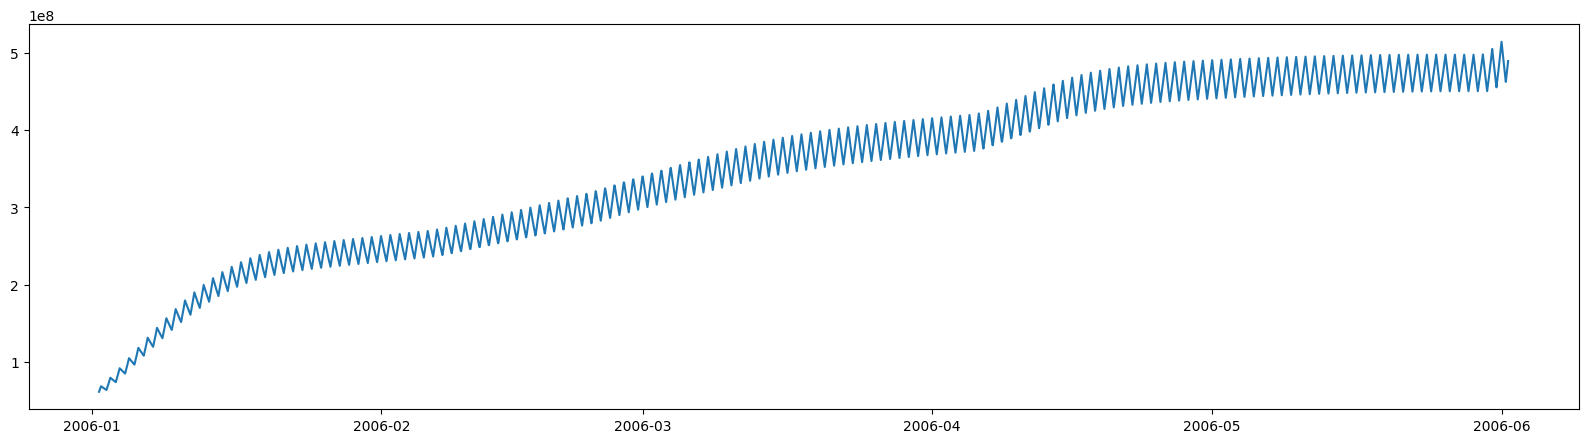

In [38]:
cgem_plot1D(grid,'A')

## Save the variable
We want to change the temperature and see what happens to A, so...

In [39]:
A_t16 = cgem_getvar("A")

Calculating CGEM variable A


## You can edit the file grid.nml directly, or use Python f90nml function to change it
See: http://f90nml.readthedocs.org/en/latest/

First, save a copy of grid.nml.

In [40]:
!cp grid.nml savegrid.nml

## Use f90nml to modify the namelist
```
grid['hydro']['temp_init'] = 30
grid.write('my_grid.nml')
```

The f90nml will not overwrite an existing file, so save the new file as ***mygrid.nml***.

In [41]:
grid['hydro']['temp_init'] = 30
grid.write('my_grid.nml')

The CGEM executable reads **grid.nml***, not my_grid.nml, so you have to *overwrite* grid.nml.  (I can make a Python function to make this easier later.  Baby steps.). We'll just use `mv` in the shell.

In [42]:
!mv my_grid.nml grid.nml

Check that the temperature was modified properly.

In [43]:
print(grid)
print("Temperature=",grid.get('hydro').get('temp_init'))

&hydro
    nea = 1
    km = 5
    iyrs = 2006
    imons = 1
    idays = 1
    ihrs = 18
    imins = 0
    isecs = 0
    iyre = 2006
    imone = 6
    idaye = 1
    ihre = 18
    imine = 0
    isece = 0
    dt = 3600
    dt_out = 3600
    lon_in = -92.39
    lat_in = 29.03
    depth_in = 20.0
    sal_init = 30.0
    temp_init = 30
/
Temperature= 30


## Plot A at both temperatures
Get the new value, and define time while you are at it.

In [44]:
A_t30 = cgem_getvar("A")
T = cgem_timearray(A_t30,grid)

Calculating CGEM variable A


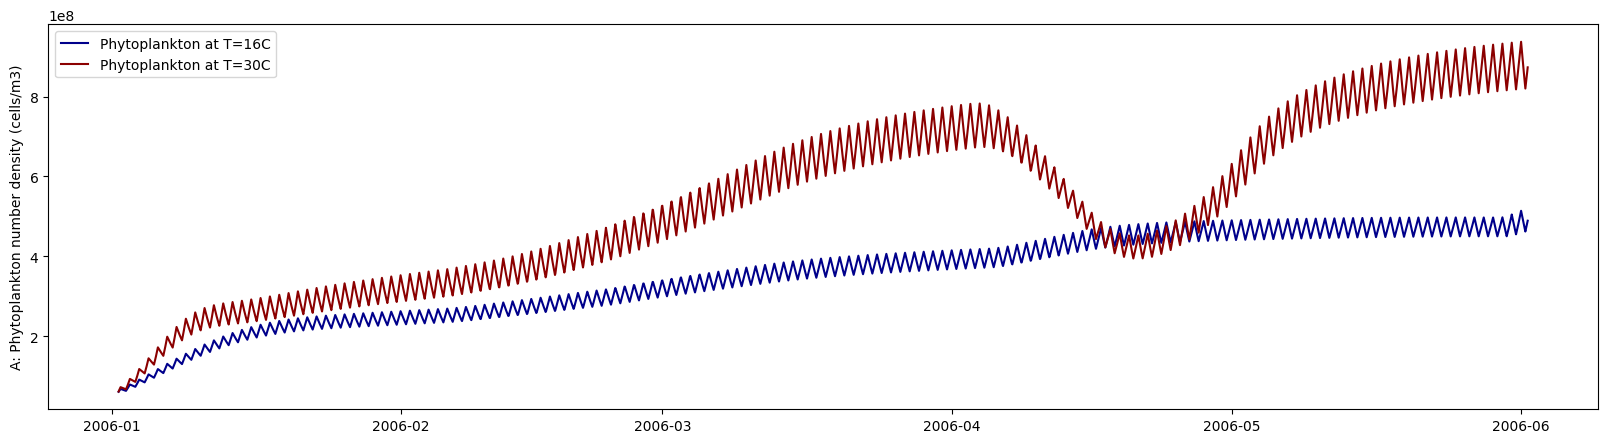

In [45]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(T,A_t16, color='darkblue', label='Phytoplankton at T=16C')
ax.plot(T,A_t30, color='darkred', label='Phytoplankton at T=30C')
ax.legend()
plt.ylabel('A: Phytoplankton number density (cells/m3)')
plt.show()

## Wow, I'm pretty relieved they are different, aren't you?
Try some more plots and let me know what happens.

### If you want to this test this again in the same Binder session, get the nml back the way it was. 

In [46]:
!cp nml_save/grid.nml grid.nml